# 
<h2 style="text-align: center; color: #1f77b4;">🧹 Data Cleaning</h2>

<p style="text-align: center;">
    <img src="1674986094871.jpg" alt="Data Cleaning" style="width: 50%; height: auto;">
</p>


## <span style="color:red">Bank Customer Churn Dataset Overview</span>

### 1️. Dataset Summary
- **Number of Rows:** 10,000
- **Number of Columns:** 14
- **Target Variable:** `Exited` (1 = Customer left bank, 0 = Customer stayed)
- **Goal:** Predict customer churn based on demographic and financial features.

---

### 2️. Features Overview

<table>
<tr><th style="color:blue">Column</th><th style="color:green">Type</th><th style="color:purple">Description</th></tr>
<tr><td>RowNumber</td><td>Integer</td><td>Row index (not useful for prediction)</td></tr>
<tr><td>CustomerId</td><td>Integer</td><td>Unique ID of the customer</td></tr>
<tr><td>Surname</td><td>Object</td><td>Customer last name (not predictive)</td></tr>
<tr><td>CreditScore</td><td>Integer</td><td>Customer credit score</td></tr>
<tr><td>Geography</td><td>Category</td><td>Country of residence (France, Spain, Germany)</td></tr>
<tr><td>Gender</td><td>Category</td><td>Male or Female</td></tr>
<tr><td>Age</td><td>Integer</td><td>Customer age in years</td></tr>
<tr><td>Tenure</td><td>Integer</td><td>Years the customer has been with the bank</td></tr>
<tr><td>Balance</td><td>Float</td><td>Customer account balance</td></tr>
<tr><td>NumOfProducts</td><td>Integer</td><td>Number of bank products used</td></tr>
<tr><td>HasCrCard</td><td>Integer</td><td>1 = Has credit card, 0 = No</td></tr>
<tr><td>IsActiveMember</td><td>Integer</td><td>1 = Active customer, 0 = Inactive</td></tr>
<tr><td>EstimatedSalary</td><td>Float</td><td>Estimated annual salary</td></tr>
<tr><td>Exited</td><td>Integer</td><td>Target: 1 = Customer left, 0 = Still customer</td></tr>
</table>

---

### 3️. Key Observations
- **Gender distribution:** Balanced between Male & Female.  
- **Geography:** Customers mainly from France, Spain, and Germany.  
- **Age factor:** Older customers more likely to churn.  
- **Churn rate:** ~20% of customers exited the bank.  
- **Activity:** Inactive customers more likely to churn.  
- **Balance & Salary:** Wide range, with some extreme outliers.  

---

### 4️. Notes
- Columns `RowNumber`, `CustomerId`, `Surname` are identifiers → should be dropped.  
- `Geography` & `Gender` require **encoding** (One-Hot / Label Encoding).  
- Dataset is suitable for **classification task** predicting `Exited`.  



In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [33]:
df = pd.read_csv("pre_cleaned_data.csv")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <span style="color:yellow">Check nulls and missing values and duplicates</span>
#### no missing values found or duplicates

In [34]:
df.isnull().mean().round(4)*100


CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [35]:
df.duplicated().sum()

np.int64(0)

## <span style="color:yellow">Handling Outliers</span>


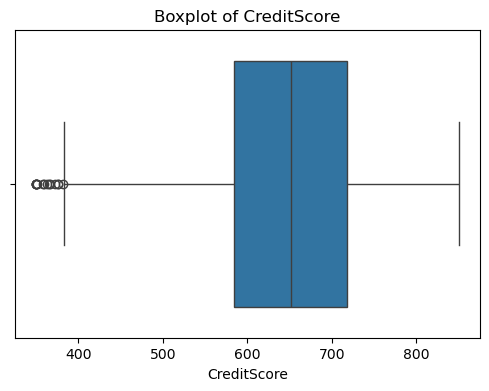

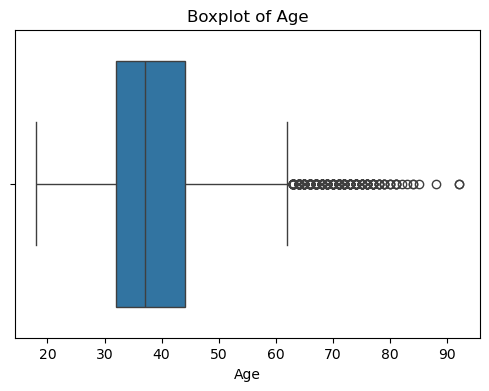

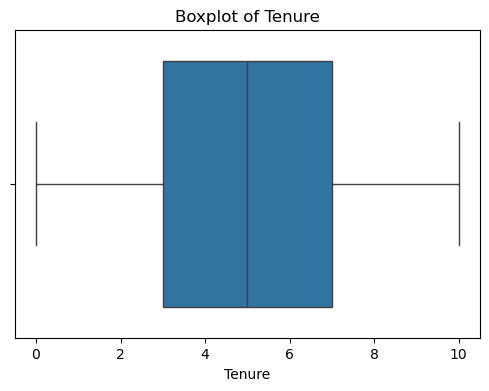

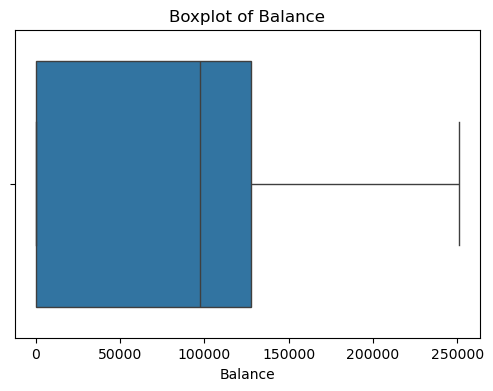

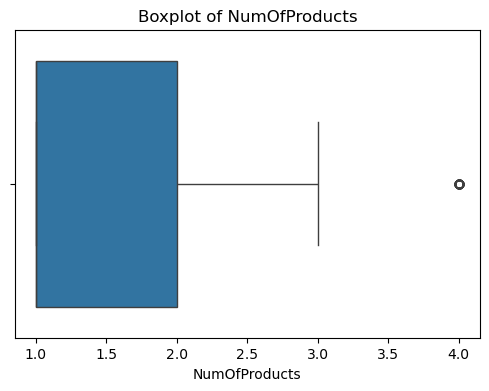

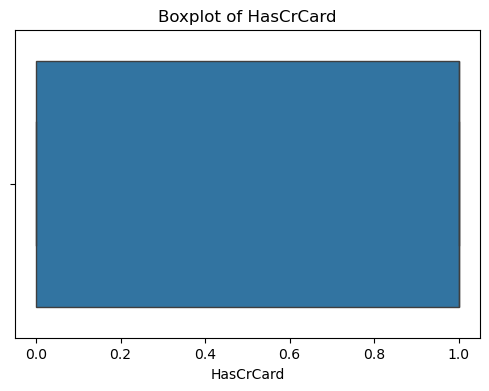

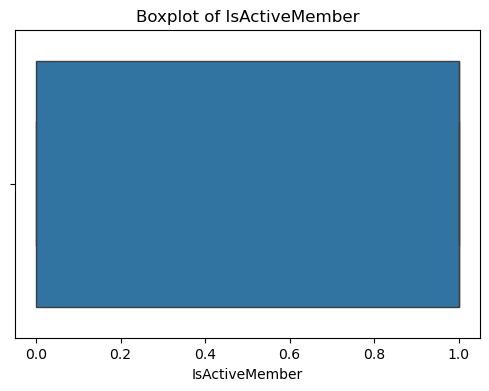

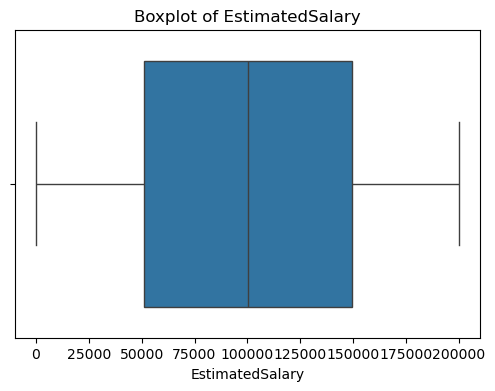

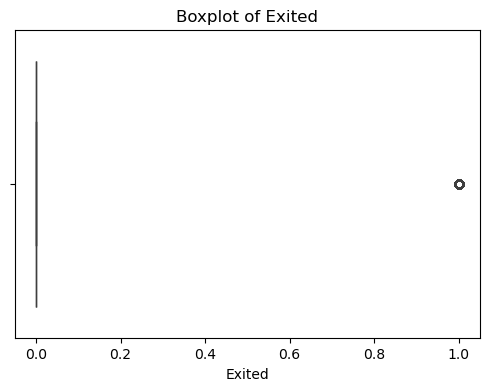

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [37]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    

CreditScore: 15 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers
Exited: 2037 outliers


In [38]:
import numpy as np
import pandas as pd

outlier_cols = ['CreditScore', 'Age']

print("Before Capping:")
for col in outlier_cols:
    print(f"{col} -> Min: {df[col].min()}, Max: {df[col].max()}")

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\nAfter Capping:")
for col in outlier_cols:
    print(f"{col} -> Min: {df[col].min()}, Max: {df[col].max()}")


Before Capping:
CreditScore -> Min: 350, Max: 850
Age -> Min: 18, Max: 92

After Capping:
CreditScore -> Min: 383.0, Max: 850.0
Age -> Min: 18.0, Max: 62.0


In [39]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    

CreditScore: 0 outliers
Age: 0 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers
Exited: 2037 outliers


# <span style="color:red">Feature Engineering</span>
#### Balance_per_Product → Average balance per product.

#### Tenure_per_Age → Tenure divided by age.

#### HighSalary → 1 if salary > 150k, else 0.

#### AgeGroup → Young (<30), Adult (30–59), Senior (60+).

In [52]:
# Balance per Product
df['Balance_per_Product'] = df['Balance'] / df['NumOfProducts']

# Tenure per Age
df['Tenure_per_Age'] = df['Tenure'] / df['Age']

# HighSalary Flag
salary_threshold = 150000
df['HighSalary'] = (df['EstimatedSalary'] > salary_threshold).astype(int)

# Age Group
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

# عرض أول 5 صفوف للتأكدdf.head())
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Product,Tenure_per_Age,HighSalary,AgeGroup
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,0,Adult
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,83807.860000,0.024390,0,Adult
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,53220.266667,0.190476,0,Adult
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,0,Adult
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,125510.820000,0.046512,0,Adult


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  float64
 1   Geography            10000 non-null  object 
 2   Gender               10000 non-null  object 
 3   Age                  10000 non-null  float64
 4   Tenure               10000 non-null  int64  
 5   Balance              10000 non-null  float64
 6   NumOfProducts        10000 non-null  int64  
 7   HasCrCard            10000 non-null  int64  
 8   IsActiveMember       10000 non-null  int64  
 9   EstimatedSalary      10000 non-null  float64
 10  Exited               10000 non-null  int64  
 11  Balance_per_Product  10000 non-null  float64
 12  Tenure_per_Age       10000 non-null  float64
 13  HighSalary           10000 non-null  int64  
 14  AgeGroup             10000 non-null  object 
dtypes: float64(6), int64(6), object(3)
me

In [51]:
categorical_cols = ['Geography', 'Gender', 'AgeGroup']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  float64 
 1   Geography            10000 non-null  category
 2   Gender               10000 non-null  category
 3   Age                  10000 non-null  float64 
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  int64   
 8   IsActiveMember       10000 non-null  int64   
 9   EstimatedSalary      10000 non-null  float64 
 10  Exited               10000 non-null  int64   
 11  Balance_per_Product  10000 non-null  float64 
 12  Tenure_per_Age       10000 non-null  float64 
 13  HighSalary           10000 non-null  int64   
 14  AgeGroup             10000 non-null  category
dtypes: category(3), floa

In [50]:
df.to_csv("cleaned_data.csv", index=False)